In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.linear_model import LogisticRegression

# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# for data prep
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# for data exploration
from matplotlib import pyplot as plt

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.inspection import permutation_importance



## 1. Introduction / Motivation / Literature Review (25 pts)


Reference Website: 
1. https://towardsdatascience.com/cnn-lstm-predicting-daily-hotel-cancellations-e1c75697f124
2. https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0010

Booking hotels is a very common act in our daily life. Nowadays, the cancellation rate of hotels keeps increasing (Orange hotel Marketing, October 2020). This phenomenon is largely due to the ‘free of charge up to 24 hours before arrival’ policy (‘Cancel Hotel Reservation, Hotel Cancellation Policies’, October 2020). As a tourist, you must wonder the cancellation policy for each hotel so that you can plan your trip flexibly. As a hospitality industry worker, you must want to make appropriate cancellation strategy to maximize profit for your company. Flexible cancellation policy means good relationship between hotels and customers and high financial risks for hotels (‘Hotel cancellations pose a great challenge’, January 2020).Therefore, a good cancellation strategy benefits hotel by making much revenue from loyal relationship between consumers so that it can cover the loss of cancellation(Joshua Meehan, December 2014).

>


The rapid increasing cancellation rate also relates to the increasing use of internet. (Kevin May, April 2019) Online booking system is a double sides sword. It has advantages and disadvantages for hotels (Team foreUP, December 2018). Hence, it is important to understand it and use it smartly. In other word, the channel that guests used to book the room would also influence the cancellation rate.

> 


What’s more, according to Shivani Vora, the season and holiday would also influence the cancellation rate of booking hotels(Shivani Vora, August 2020). For example, people are more likely to get cold in Winter so that the travel plans are likely to change in Winter.

> 


In addition, the cancellation rate also relates to guests’ personality. For example, some people are changeable and picky. They are used to changing the original plan (M.Farouk Radwan). If the hotels can identify these guests based on their history cancellation records, hotels can make policy to restrict their cancellation times to minimize financial loss.

> 


What’s more, guests usually decide to change the booking plan due to comparison. If guests can find the same type of room with lower rate, they would consider cancelling the original booking plan. Hence, some hotels would offer a lower room rate to let guests give up the right of cancellation (Christopher Elliott, May 2019) .

> 


We also predict that loyal guests are less likely to cancel a reservation. Repeated guests build bonds with hotels (Grace Miller).

> 


Therefore, there are various factors related to hotel cancellation rate. It is important for both tourist and hotels to forecast the pattern. Our team decided to build neural net work models and predict whether this guest would cancel the booking or not.



Reference list
1.	Orange hotel Marketing. ‘Increasing cancellation rates hurting hotels’. October 2020. Retrieved from https://www.scribbr.com/category/dissertation/
2.	‘Cancel Hotel Reservation, Hotel Cancellation Policies’. October 2020. Retrieved from https://www.roomertravel.com/cancellation/hotel_cancellation_policies
3.	‘Hotel cancellations pose a great challenge’, January 2020. Retrieved from https://www.rateboard.io/en/blog/hotel-cancellations-pose-a-great-challenge
4.	Joshua Meehan. ‘The benefits of a flexible cancellation policy’. December 2014. Retrieved from https://www.e-marketingassociates.com/blog/the-benefits-of-a-flexible-cancellation-policy
5.	Kevin May. ‘Hotel cancelation rate at 40% as online travel agencies push free change policy’ April, 2019. Retrieved from https://www.phocuswire.com/Hotel-distribution-market-share-distribution-analysis
6.	Team foreUP. ‘Advantages and Disadvantages of Using an Online Booking System’. December 2018. Retrieved from https://blog.foreupgolf.com/advantages-disadvantages-online-booking-system
7.	Shivani Vora. ‘Is winter holiday travel canceled? Not quite’. August 2020. Retrieved from https://www.cnn.com/travel/article/winter-holiday-travel-2020-covid-19/index.html
8.	M.Farouk Radwan. ‘Why are some people fickle’. Retrieved from https://www.2knowmyself.com/why_are_some_people_fickle
9.	Christopher Elliott. ‘How to avoid a hotel cancellation penalty’. May 2019. Retrieved from https://www.usatoday.com/story/travel/advice/2019/05/03/hotel-cancellation-penalty-fee/3647526002/
10.	Grace Miller. ‘10 Benefits Of Implementing A Customer Loyalty Program’. Retrieved from https://www.annexcloud.com/blog/10-benefits-implementing-customer-loyalty-program/

## 2. Data Gathering and Description (20 pts)

  1.   Read data and check data, and exclude/recode NAs if necessary

In [ ]:
# We have two datasets with similar hotel records and we'll check the columns and concatenate them together.
 
df2 = pd.read_csv('/content/drive/Shared drives/OPIM 5509 Introduction to Deep Learning/Project 1 - Classification/Hotel Cancellation Dataset/Hotel 2.csv')
df1 = pd.read_csv('/content/drive/Shared drives/OPIM 5509 Introduction to Deep Learning/Project 1 - Classification/Hotel Cancellation Dataset/Hotel 1.csv')

In [ ]:
# Check the sequence of columns 
print(df1.columns)
print(df2.columns)

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')
Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBooki

In [ ]:
df = pd.concat([df1, df2])

In [ ]:
# check for missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IsCanceled                   119390 non-null  int64  
 1   LeadTime                     119390 non-null  int64  
 2   ArrivalDateYear              119390 non-null  int64  
 3   ArrivalDateMonth             119390 non-null  object 
 4   ArrivalDateWeekNumber        119390 non-null  int64  
 5   ArrivalDateDayOfMonth        119390 non-null  int64  
 6   StaysInWeekendNights         119390 non-null  int64  
 7   StaysInWeekNights            119390 non-null  int64  
 8   Adults                       119390 non-null  int64  
 9   Children                     119386 non-null  float64
 10  Babies                       119390 non-null  int64  
 11  Meal                         119390 non-null  object 
 12  Country                      118902 non-null  object 
 13  

In [ ]:
df.isna().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         4
Babies                           0
Meal                             0
Country                        488
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

In [ ]:
# Exclude rows with NA 
df = df.dropna(axis='rows')

In [ ]:
# check distribution of target variable
df['IsCanceled'].value_counts()

0    74745
1    44153
Name: IsCanceled, dtype: int64

In [ ]:
# if your model is smart, it should have an accuracy better
# than a dummy model (that just predicts the majority class)
44153/(46226+74745)

0.36498830298170637

In [ ]:
df.shape

(118898, 31)

2. Subsetting

In [ ]:
# By checking the raw data, we found that data for Year 2016 contains records for 12 months while our most recent hotel
# cancellation data in hand, which is data for Year 2017, doesn't have year-round records. Thus, we decide to subset 
# data and only explore dataset for year 2016.
df = df[df['ArrivalDateYear']==2016]
df = df.drop(['ArrivalDateYear'],axis=1)

In [ ]:
df.shape

(56435, 30)

3. - Exclude the columns that're less helpful
**Numeric：**
- ArrivalDateWeekNumber

- ArrivalDateDayOfMonth

- PreviousBookingsNotCanceled

**Categorical:**

- Country (too many, maybe can be used after modeling and we focus on hotel cancellation in a few western countries)

- ReservedRoomType (Logically, customers may value AssignedRoomType more)

- Agent (too many values)

- Company (too many values)

- ReservationStatus(Nonsense)


  
  - Add columns - RoomTypeDiff, stating the difference between reserved room type and assigned room type 




In [ ]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateMonth', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [ ]:
# Delete useless numeric variables
df = df.drop(['ArrivalDateWeekNumber','ArrivalDateDayOfMonth','PreviousBookingsNotCanceled'],axis=1)

In [ ]:
# Check values for categorical columns 
# Some might have many NULLs or many values, in these cases, it's not appropriate to recode with one hot encoding 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56435 entries, 3738 to 64159
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IsCanceled                56435 non-null  int64  
 1   LeadTime                  56435 non-null  int64  
 2   ArrivalDateMonth          56435 non-null  object 
 3   StaysInWeekendNights      56435 non-null  int64  
 4   StaysInWeekNights         56435 non-null  int64  
 5   Adults                    56435 non-null  int64  
 6   Children                  56435 non-null  float64
 7   Babies                    56435 non-null  int64  
 8   Meal                      56435 non-null  object 
 9   Country                   56435 non-null  object 
 10  MarketSegment             56435 non-null  object 
 11  DistributionChannel       56435 non-null  object 
 12  IsRepeatedGuest           56435 non-null  int64  
 13  PreviousCancellations     56435 non-null  int64  
 14  Res

In [ ]:
cat = df.iloc[:,[2,8,9,10,11,14,15,17,18,19,21,25,26]] 
columns = cat.columns
for col in columns:
  print(cat[col].value_counts())

October      6176
May          5466
April        5404
September    5383
June         5280
August       5054
March        4788
July         4552
November     4432
February     3857
December     3828
January      2215
Name: ArrivalDateMonth, dtype: int64
BB           44307
HB            6158
SC            5053
Undefined      583
FB             334
Name: Meal, dtype: int64
PRT    22321
GBR     5585
FRA     5165
ESP     4024
DEU     3865
       ...  
SYC        1
COM        1
BFA        1
LCA        1
SLV        1
Name: Country, Length: 151, dtype: int64
Online TA        27618
Offline TA/TO    12454
Groups            7854
Direct            5573
Corporate         2449
Complementary      360
Aviation           127
Name: MarketSegment, dtype: int64
TA/TO        46451
Direct        6702
Corporate     3178
GDS            104
Name: DistributionChannel, dtype: int64
A                   40498
D                    9407
E                    2859
F                    1420
G                     992
B 

In [ ]:
# We notice that for column 'ReservedRoomType' and 'AssignedRoomType', we may optuimize the columns by
# checking if the customers is assigned to the room types they were willing to reserve at the very beginning.
# Thus, we can compare the difference between the two columns by creating a new column 'RoomType_Diff'.
df['RoomType_Diff'] = np.where( df['ReservedRoomType'] == df['AssignedRoomType'], 0, 1)
df['RoomType_Diff'].value_counts()

0    48938
1     7497
Name: RoomType_Diff, dtype: int64

In [ ]:
# Then we decide to delete columns 'ReservedRoomType' but reserve 'AssignedRoomType' because customers may 
# decide cancel or not mainly based on the final assigned room.
df = df.drop('AssignedRoomType', 1)

In [ ]:
df = df.drop(['Country','Agent','Company','ReservationStatus','ReservationStatusDate'],axis=1)

4. Recode the categorical variables: 
- Extract **Month** info of ReservationStatusDate
- One-hot encoding 

In [ ]:
cat['ReservationStatusDate'] = pd.to_datetime(cat['ReservationStatusDate'].str.strip(), format='%Y/%m/%d')
cat['ReservationStatusMonth'] = cat['ReservationStatusDate'].dt.strftime('%m')
cat = cat.drop(['ReservationStatusDate','AssignedRoomType','Country','Agent','Company','ReservationStatus'],axis=1)
cat.head()

,ArrivalDateMonth,Meal,MarketSegment,DistributionChannel,ReservedRoomType,DepositType,CustomerType,ReservationStatusMonth
3738,January,BB,Online TA,TA/TO,A,No Deposit,Transient-Party,01
3739,January,BB,Online TA,TA/TO,H,No Deposit,Transient-Party,01
3740,January,BB,Online TA,TA/TO,D,No Deposit,Transient,01
3741,January,HB,Online TA,TA/TO,A,No Deposit,Transient,01
3742,January,BB,Online TA,TA/TO,G,No Deposit,Transient,12


In [ ]:
ArrivalDateMonth = pd.get_dummies(cat[['ArrivalDateMonth']], drop_first=True)
Meal = pd.get_dummies(cat[['Meal']], drop_first=True)
MarketSegment = pd.get_dummies(cat[['MarketSegment']], drop_first=True)
DistributionChannel = pd.get_dummies(cat[['DistributionChannel']],drop_first=True)
ReservedRoomType = pd.get_dummies(cat[['ReservedRoomType']],drop_first=True)
DepositType = pd.get_dummies(cat[['DepositType']],drop_first=True)
CustomerType = pd.get_dummies(cat[['CustomerType']],drop_first=True)
ReservationStatusMonth = pd.get_dummies(cat[['ReservationStatusMonth']],drop_first=True)

In [ ]:
cat_all = pd.concat([ArrivalDateMonth, Meal], axis=1)
cat_all = pd.concat([cat_all, MarketSegment], axis=1)
cat_all = pd.concat([cat_all, DistributionChannel], axis=1)
cat_all = pd.concat([cat_all, ReservedRoomType], axis=1)
cat_all = pd.concat([cat_all, DepositType], axis=1)
cat_all = pd.concat([cat_all, CustomerType], axis=1)
cat_all = pd.concat([cat_all, ReservationStatusMonth], axis=1)

In [ ]:
cat_all.shape

(56435, 47)

In [ ]:
cat_all.head()

,ArrivalDateMonth_August,ArrivalDateMonth_December,ArrivalDateMonth_February,ArrivalDateMonth_January,ArrivalDateMonth_July,ArrivalDateMonth_June,ArrivalDateMonth_March,ArrivalDateMonth_May,ArrivalDateMonth_November,ArrivalDateMonth_October,ArrivalDateMonth_September,Meal_FB,Meal_HB,Meal_SC,Meal_Undefined,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_H,DepositType_Non Refund,DepositType_Refundable,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,ReservationStatusMonth_02,ReservationStatusMonth_03,ReservationStatusMonth_04,ReservationStatusMonth_05,ReservationStatusMonth_06,ReservationStatusMonth_07,ReservationStatusMonth_08,ReservationStatusMonth_09,ReservationStatusMonth_10,ReservationStatusMonth_11,ReservationStatusMonth_12
3738,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3739,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3740,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3741,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3742,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.head()

,IsCanceled,LeadTime,ArrivalDateMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,ReservedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,RoomType_Diff
3738,0,109,January,0,1,2,0.0,0,BB,Online TA,TA/TO,0,0,A,0,No Deposit,0,Transient-Party,59.94,0,1,1
3739,0,109,January,0,1,2,2.0,0,BB,Online TA,TA/TO,0,0,H,0,No Deposit,0,Transient-Party,116.10,1,1,0
3740,1,2,January,0,1,2,0.0,0,BB,Online TA,TA/TO,0,0,D,0,No Deposit,0,Transient,89.00,0,1,0
3741,0,88,January,0,2,2,0.0,0,HB,Online TA,TA/TO,0,0,A,0,No Deposit,0,Transient,73.46,0,2,1
3742,1,20,January,0,2,2,2.0,0,BB,Online TA,TA/TO,0,0,G,0,No Deposit,0,Transient,119.00,0,0,0


In [ ]:
df_new = pd.concat([df, cat_all], axis=1)

In [ ]:
print(df_new.shape)
df_new.head()

(56435, 69)


,IsCanceled,LeadTime,ArrivalDateMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,ReservedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,RoomType_Diff,ArrivalDateMonth_August,ArrivalDateMonth_December,ArrivalDateMonth_February,ArrivalDateMonth_January,ArrivalDateMonth_July,ArrivalDateMonth_June,ArrivalDateMonth_March,ArrivalDateMonth_May,ArrivalDateMonth_November,ArrivalDateMonth_October,ArrivalDateMonth_September,Meal_FB,Meal_HB,Meal_SC,Meal_Undefined,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_H,DepositType_Non Refund,DepositType_Refundable,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,ReservationStatusMonth_02,ReservationStatusMonth_03,ReservationStatusMonth_04,ReservationStatusMonth_05,ReservationStatusMonth_06,ReservationStatusMonth_07,ReservationStatusMonth_08,ReservationStatusMonth_09,ReservationStatusMonth_10,ReservationStatusMonth_11,ReservationStatusMonth_12
3738,0,109,January,0,1,2,0.0,0,BB,Online TA,TA/TO,0,0,A,0,No Deposit,0,Transient-Party,59.94,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3739,0,109,January,0,1,2,2.0,0,BB,Online TA,TA/TO,0,0,H,0,No Deposit,0,Transient-Party,116.10,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3740,1,2,January,0,1,2,0.0,0,BB,Online TA,TA/TO,0,0,D,0,No Deposit,0,Transient,89.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3741,0,88,January,0,2,2,0.0,0,HB,Online TA,TA/TO,0,0,A,0,No Deposit,0,Transient,73.46,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3742,1,20,January,0,2,2,2.0,0,BB,Online TA,TA/TO,0,0,G,0,No Deposit,0,Transient,119.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_new = df_new.drop(columns = [col for col in df_new if col in cat.columns])

In [ ]:
df_new.shape

(56435, 62)

In [ ]:
df_new.head()

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,RoomType_Diff,ArrivalDateMonth_August,ArrivalDateMonth_December,ArrivalDateMonth_February,ArrivalDateMonth_January,ArrivalDateMonth_July,ArrivalDateMonth_June,ArrivalDateMonth_March,ArrivalDateMonth_May,ArrivalDateMonth_November,ArrivalDateMonth_October,ArrivalDateMonth_September,Meal_FB,Meal_HB,Meal_SC,Meal_Undefined,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_H,DepositType_Non Refund,DepositType_Refundable,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,ReservationStatusMonth_02,ReservationStatusMonth_03,ReservationStatusMonth_04,ReservationStatusMonth_05,ReservationStatusMonth_06,ReservationStatusMonth_07,ReservationStatusMonth_08,ReservationStatusMonth_09,ReservationStatusMonth_10,ReservationStatusMonth_11,ReservationStatusMonth_12
3738,0,109,0,1,2,0.0,0,0,0,0,0,59.94,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3739,0,109,0,1,2,2.0,0,0,0,0,0,116.10,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3740,1,2,0,1,2,0.0,0,0,0,0,0,89.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3741,0,88,0,2,2,0.0,0,0,0,0,0,73.46,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3742,1,20,0,2,2,2.0,0,0,0,0,0,119.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


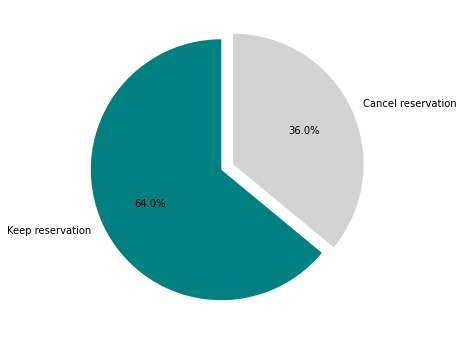

In [ ]:
# Plot1: Target % -  Cancellation: 0 vs 1
values = df['IsCanceled'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(values, explode = (0,0.1),autopct='%1.1f%%',labels=['Keep reservation','Cancel reservation'], shadow=False,startangle=90,colors=['teal','lightgrey'])
plt.show()

# Modeling (20 pts) - Logistic, FNN, CNN

1. Split data

In [ ]:
# split into X and Y
y = df_new['IsCanceled']
X = df_new.drop(['IsCanceled'], axis=1)

print(X.shape)
print(y.shape)

(56435, 61)
(56435,)


In [ ]:
# convert to numpy arrays
X = np.array(X)
y = np.array(y)

In [ ]:
# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45148, 61) (11287, 61) (45148,) (11287,)


In [ ]:
# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

2. Build, compile, fit model

Since we are dealing with classification problem, we'll use **logistic regression** model as our baseline model.

Apart from that, we will mainly use **FNN** and **CNN** and adjust the parameters 
(number of layers, activation function, units, epochs, dropout, kernal size, filters etc.) 
to see if our models can get better performance. 

1.   Logistic Regression
2.   FNN
3.   CNN





#  1. Baseline model -Logistic Regression

In [ ]:
# 2. Logistic Regression
LR = LogisticRegression()

# fit the model 
LR = LR.fit(X_train, y_train)

# store the predictions
train_preds_LR = LR.predict(X_train) 
test_preds_LR = LR.predict(X_test) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Result - Logistic

In [ ]:
# train confusion matrix
confusion_matrix(y_train, train_preds_LR)

array([[27282,  1671],
       [ 5799, 10396]])

In [ ]:
# test confusion matrix
confusion_matrix(y_test, test_preds_LR)

array([[6827,  342],
       [1488, 2630]])

In [ ]:
# extract TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_LR).ravel()
(tn, fp, fn, tp)

(6827, 342, 1488, 2630)

In [ ]:
# train report
trainReport_LR = classification_report(y_train, train_preds_LR)
print(trainReport_LR)

# test report
testReport_LR = classification_report(y_test, test_preds_LR)
print(testReport_LR)

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     28953
           1       0.86      0.64      0.74     16195

    accuracy                           0.83     45148
   macro avg       0.84      0.79      0.81     45148
weighted avg       0.84      0.83      0.83     45148

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7169
           1       0.88      0.64      0.74      4118

    accuracy                           0.84     11287
   macro avg       0.85      0.80      0.81     11287
weighted avg       0.84      0.84      0.83     11287



In [ ]:
X_t = pd.DataFrame(X_test)

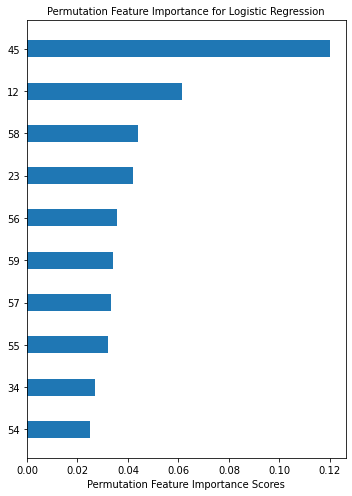

In [ ]:
# perform permutation importance
results = permutation_importance(LR,X_train, y_train, scoring='neg_root_mean_squared_error',random_state=123)
plt.figure(figsize=(5,7))

#get importance
importance = results.importances_mean
nums=10
sorted_idx = np.argsort(importance)[-nums:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[-nums:], importance[sorted_idx],height=0.4,align='center')
plt.yticks(pos[-nums:], X_t.columns[sorted_idx],fontsize=10)
plt.xlabel('Permutation Feature Importance Scores', fontsize=10)
#plt.xticks(fontsize=100)
plt.title('Permutation Feature Importance for Logistic Regression', fontsize=10)

plt.tight_layout()

plt.show()

In [ ]:
df_new.iloc[:,[45,12,58,23,56,59,57,55,34,54]].columns

Index(['ReservedRoomType_H               ', 'RequiredCarParkingSpaces',
       'ReservationStatusMonth_09', 'ArrivalDateMonth_November',
       'ReservationStatusMonth_07', 'ReservationStatusMonth_10',
       'ReservationStatusMonth_08', 'ReservationStatusMonth_06',
       'MarketSegment_Offline TA/TO', 'ReservationStatusMonth_05'],
      dtype='object')

In [ ]:
result = pd.DataFrame(LR.coef_)
result.head()
result=result.iloc[:,[45,12,58,23,56,59,57,55,34,54]]
result.columns = ['ReservedRoomType_H', 'RequiredCarParkingSpaces',
       'ReservationStatusMonth_09', 'ArrivalDateMonth_November',
       'ReservationStatusMonth_07', 'ReservationStatusMonth_10',
       'ReservationStatusMonth_08', 'ReservationStatusMonth_06',
       'MarketSegment_Offline TA/TO', 'ReservationStatusMonth_05']
result

,ReservedRoomType_H,RequiredCarParkingSpaces,ReservationStatusMonth_09,ArrivalDateMonth_November,ReservationStatusMonth_07,ReservationStatusMonth_10,ReservationStatusMonth_08,ReservationStatusMonth_06,MarketSegment_Offline TA/TO,ReservationStatusMonth_05
0,5.609015,-4.283684,-2.819192,2.136262,-2.353165,-2.772402,-2.131742,-1.956398,0.915462,-1.605774


As the result shows, we got a **total accuracy of 0.84** in 
test set, which is .01 over than that in training set. 

However, the **recall** in both datasets is low (0.64), which means we are only able to accurately capture 64% of the cancellation. 

As the result of **permutation feature importance** shows, the top ten variables indicating their relative importance  when making a prediction of hotel cancellation are 'ReservedRoomType_H', 'RequiredCarParkingSpaces','ReservationStatusMonth_09', 'ArrivalDateMonth_November',
'ReservationStatusMonth_07', 'ReservationStatusMonth_10',
'ReservationStatusMonth_08', 'ReservationStatusMonth_06',
'MarketSegment_Offline TA/TO', 'ReservationStatusMonth_05'.

It seems that customers booking hotels with arrival date in November are more likely to cancel their reservation than customers booking hotels for other time and custoemrs who require car parking spaces are less likely to. Also, those who asking for room type H are more likely to cancel their order. 


# 2. FNN

In [ ]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # don't forget to add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # force the input data to be 0~1 (probability, cut0off:0.5)
model.summary() 

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                992       
_________________________________________________________________
dense_37 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 17        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer='Adam', # or 'rmsprop'
              loss='binary_crossentropy', # look two different probability distributions much seperatey
              metrics=['accuracy'])

In [ ]:
# early stopping callback
es = EarlyStopping(monitor='accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, 
                    batch_size=10,
                    validation_data=(X_test, y_test),
                    shuffle=True,
                    verbose=1)

Epoch 1/80
4515/4515 [==============================] - 5s 1ms/step - loss: 0.3573 - accuracy: 0.8506 - val_loss: 0.2800 - val_accuracy: 0.8942
Epoch 2/80
4515/4515 [==============================] - 5s 1ms/step - loss: 0.2510 - accuracy: 0.9081 - val_loss: 0.2415 - val_accuracy: 0.9123
Epoch 3/80
4515/4515 [==============================] - 5s 1ms/step - loss: 0.2290 - accuracy: 0.9160 - val_loss: 0.2355 - val_accuracy: 0.9142
Epoch 4/80
4515/4515 [==============================] - 5s 1ms/step - loss: 0.2201 - accuracy: 0.9196 - val_loss: 0.2264 - val_accuracy: 0.9165
Epoch 5/80
4515/4515 [==============================] - 5s 1ms/step - loss: 0.2159 - accuracy: 0.9206 - val_loss: 0.2220 - val_accuracy: 0.9187
Epoch 6/80
4515/4515 [==============================] - 5s 1ms/step - loss: 0.2130 - accuracy: 0.9216 - val_loss: 0.2215 - val_accuracy: 0.9191
Epoch 7/80
4515/4515 [==============================] - 5s 1ms/step - loss: 0.2097 - accuracy: 0.9227 - val_loss: 0.2209 - val_accuracy:

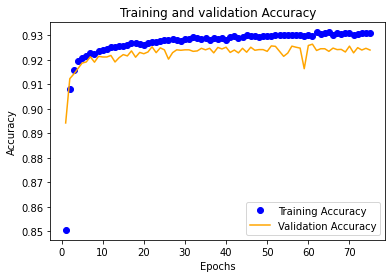

In [ ]:
# let's see the training and validation loss by epoch
history.history.keys()
history_dict = history.history
train_acc = history_dict['accuracy'] # you can change this
test_acc = history_dict['val_accuracy'] # you can also change this
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, test_acc, 'orange', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# A little overfitting! We'll try fixing it by adjusting parameters!

# Result & Discussion - FNN

In [ ]:
# FNN
# see how the model did!
preds = np.round(model.predict(X_train),0)

# confusion matrix
confusion_matrix(y_train, preds) # order matters! (actual, predicted)

array([[28484,   469],
       [ 2695, 13500]])

In [ ]:
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     28953
           1       0.97      0.83      0.90     16195

    accuracy                           0.93     45148
   macro avg       0.94      0.91      0.92     45148
weighted avg       0.93      0.93      0.93     45148



In [ ]:
# see how the model did!
preds = np.round(model.predict(X_test),0)

# confusion matrix
confusion_matrix(y_test, preds) # order matters! (actual, predicted)

array([[7022,  147],
       [ 717, 3401]])

In [ ]:
print(classification_report(y_test, preds))
## A little bit overfitting!!

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7169
           1       0.96      0.83      0.89      4118

    accuracy                           0.92     11287
   macro avg       0.93      0.90      0.91     11287
weighted avg       0.93      0.92      0.92     11287



# Improved FNN


*  We added 20% **dropout** after the first hidden layer
*  For **Earlystopping**, we change the monitor from 'accuracy' to'val_loss', and change mode from 'max' to'min'
*  Reducing **patience** from 10 to 4 also improves efficiency. 
*  Increased batch size also increased from 10 to 20. Larger batch sizes slow down the learning process but the final stages result in a convergence to a more stable model exemplified by lower variance in classification accuracy



















In [ ]:
# 2. Updated FNN 
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # don't forget to add an input shape! (features,)
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # force the input data to be 0~1 (probability, cut0off:0.5)
model.summary() 

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 16)                992       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 17        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer='Adam', # or 'rmsprop'
              loss='binary_crossentropy', # look two different probability distributions much seperatey
              metrics=['accuracy'])

In [ ]:
# early stopping callback
es = EarlyStopping(monitor='val_loss', 
                                   mode='min', # don't minimize the accuracy!
                                   patience=4,
                                  verbose = 1,
                                   restore_best_weights=True)


In [ ]:

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=40, 
                    batch_size=20,
                    validation_data=(X_test, y_test),
                    shuffle=True,
                    verbose=1)

Epoch 1/40
2258/2258 [==============================] - 3s 1ms/step - loss: 0.4282 - accuracy: 0.8065 - val_loss: 0.3344 - val_accuracy: 0.8641
Epoch 2/40
2258/2258 [==============================] - 3s 1ms/step - loss: 0.3189 - accuracy: 0.8712 - val_loss: 0.2777 - val_accuracy: 0.8955
Epoch 3/40
2258/2258 [==============================] - 3s 1ms/step - loss: 0.2809 - accuracy: 0.8917 - val_loss: 0.2521 - val_accuracy: 0.9043
Epoch 4/40
2258/2258 [==============================] - 3s 1ms/step - loss: 0.2600 - accuracy: 0.9020 - val_loss: 0.2410 - val_accuracy: 0.9108
Epoch 5/40
2258/2258 [==============================] - 3s 1ms/step - loss: 0.2510 - accuracy: 0.9056 - val_loss: 0.2343 - val_accuracy: 0.9104
Epoch 6/40
2258/2258 [==============================] - 3s 1ms/step - loss: 0.2443 - accuracy: 0.9079 - val_loss: 0.2253 - val_accuracy: 0.9150
Epoch 7/40
2258/2258 [==============================] - 3s 1ms/step - loss: 0.2396 - accuracy: 0.9090 - val_loss: 0.2240 - val_accuracy:

# Result & Discussion - Improved FNN

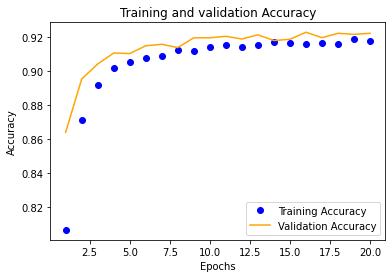

In [ ]:
# let's see the training and validation loss by epoch
history.history.keys()
history_dict = history.history
train_acc = history_dict['accuracy'] # you can change this
test_acc = history_dict['val_accuracy'] # you can also change this
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, test_acc, 'orange', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# see how the model did!
preds = np.round(model.predict(X_train),0)

# confusion matrix
confusion_matrix(y_train, preds) # order matters! (actual, predicted)

array([[28677,   276],
       [ 3043, 13152]])

In [ ]:
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     28953
           1       0.98      0.81      0.89     16195

    accuracy                           0.93     45148
   macro avg       0.94      0.90      0.92     45148
weighted avg       0.93      0.93      0.92     45148



In [ ]:
# see how the model did!
preds = np.round(model.predict(X_test),0)

# confusion matrix
confusion_matrix(y_test, preds) # order matters! (actual, predicted)

array([[7092,   77],
       [ 792, 3326]])

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7169
           1       0.98      0.81      0.88      4118

    accuracy                           0.92     11287
   macro avg       0.94      0.90      0.91     11287
weighted avg       0.93      0.92      0.92     11287



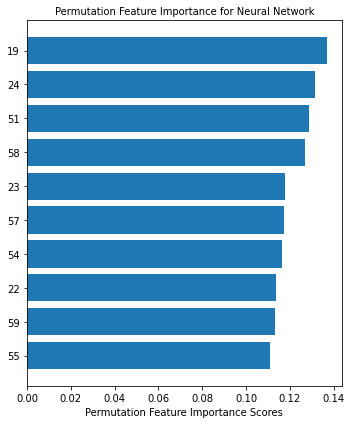

In [ ]:
#Feature Importance for FNN
X_t = pd.DataFrame(X_test)
nums=10
results = permutation_importance(model,X_train, y_train, scoring='neg_root_mean_squared_error',random_state=123)
plt.figure(figsize=(5,6))

#get importance
importance_nn = results.importances_mean
sorted_idx = np.argsort(importance_nn)[-nums:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[-nums:], importance_nn[sorted_idx],align='center')
plt.yticks(pos[-nums:], X_t.columns[sorted_idx],fontsize=10)
plt.xlabel('Permutation Feature Importance Scores', fontsize=10)
#plt.xticks(fontsize=100)
plt.title('Permutation Feature Importance for Neural Network', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
df_new.iloc[:,[19,24,51,58,23,57,54,22,59,55]].columns

Index(['ArrivalDateMonth_July', 'ArrivalDateMonth_October',
       'ReservationStatusMonth_02', 'ReservationStatusMonth_09',
       'ArrivalDateMonth_November', 'ReservationStatusMonth_08',
       'ReservationStatusMonth_05', 'ArrivalDateMonth_May',
       'ReservationStatusMonth_10', 'ReservationStatusMonth_06'],
      dtype='object')

*   Updated FNN suggests that there is **no overfitting problem** and get **accuracy over 90%** in both training and test sets. 
*   Besides, we can accurately predict **80% of hotel cancellation (recall)**, which is a big progress compared with what we got from logistic regression. 
*   The result given by **permutation feature importance** gives us the top 10 variables that may significantly affect the prediction. 

    These variables include: 'ArrivalDateMonth_November', 'ReservationStatusMonth_09','ArrivalDateMonth_October', 'RoomType_Diff','ReservationStatusMonth_07', 'ReservationStatusMonth_02','ReservationStatusMonth_08', 'ReservationStatusMonth_06','ReservationStatusMonth_05', 'ArrivalDateMonth_June'.

  Among them, **'ArrivalDateMonth_November'** pops up again. We boldly guess the effect of this on hotel cancellation is positive, which mean people are more likely to cancel their hotel reservation for November. Considering that, we may suggest hotel companys appropriately decease the proportion of hotels that can enjoy free cancellation policy in November in case number of customers cancel their hotels and lead to great losses for companies.

  Also, we notice that the **difference between room type assigned and reserved** also plays a role in this prediction.
Since we can't get the coefficient of this variables in NN, still, we boldly assume the correlation is positive. Maybe customers get unsatisfied because the assigned room type couldn't get reach their expectation. 




# 3. CNN

In [ ]:
X_train= X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],1))
y_train= y_train.reshape((y_train.shape[0],1))
y_test = y_test.reshape((y_test.shape[0],1))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.convolutional import Conv1D  
from tensorflow.keras.layers import MaxPooling1D

model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, padding='same', input_shape=(X_train.shape[1],1), activation='relu'))
model1.add(MaxPooling1D(pool_size=2, padding='valid'))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 61, 32)            128       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 30, 32)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 960)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               492032    
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 513       
Total params: 492,673
Trainable params: 492,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# early stopping callback
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', 
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model1.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, 
                    batch_size=20,
                    validation_data=(X_test,y_test),
                    verbose=1)


Epoch 1/80
2258/2258 [==============================] - 12s 5ms/step - loss: 0.2798 - accuracy: 0.8916 - val_loss: 0.2436 - val_accuracy: 0.9110
Epoch 2/80
2258/2258 [==============================] - 13s 6ms/step - loss: 0.2254 - accuracy: 0.9171 - val_loss: 0.2270 - val_accuracy: 0.9176
Epoch 3/80
2258/2258 [==============================] - 13s 6ms/step - loss: 0.2141 - accuracy: 0.9219 - val_loss: 0.2209 - val_accuracy: 0.9212
Epoch 4/80
2258/2258 [==============================] - 13s 6ms/step - loss: 0.2093 - accuracy: 0.9227 - val_loss: 0.2213 - val_accuracy: 0.9214
Epoch 5/80
2258/2258 [==============================] - 13s 6ms/step - loss: 0.2043 - accuracy: 0.9245 - val_loss: 0.2173 - val_accuracy: 0.9227
Epoch 6/80
2258/2258 [==============================] - 13s 6ms/step - loss: 0.2013 - accuracy: 0.9254 - val_loss: 0.2134 - val_accuracy: 0.9203
Epoch 7/80
2258/2258 [==============================] - 12s 5ms/step - loss: 0.1986 - accuracy: 0.9251 - val_loss: 0.2203 - val_ac

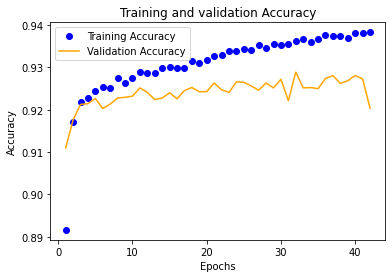

In [ ]:
# let's see the training and validation loss by epoch
history.history.keys()
history_dict = history.history
train_acc = history_dict['accuracy'] # you can change this
test_acc = history_dict['val_accuracy'] # you can also change this
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, test_acc, 'orange', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Results & Discussion - CNN

In [ ]:
# CNN
# see how the model did! - Training
preds = np.round(model1.predict(X_train),0)

# confusion matrix
confusion_matrix(y_train, preds) # order matters! (actual, predicted)

array([[28652,   301],
       [ 2438, 13757]])

In [ ]:
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     28953
           1       0.98      0.85      0.91     16195

    accuracy                           0.94     45148
   macro avg       0.95      0.92      0.93     45148
weighted avg       0.94      0.94      0.94     45148



In [ ]:
# see how the model did! - Test
preds = np.round(model1.predict(X_test),0)

# confusion matrix
confusion_matrix(y_test, preds) # order matters! (actual, predicted)

array([[7054,  115],
       [ 688, 3430]])

In [ ]:
print(classification_report(y_test, preds))
## Also, a little bit overfitting!!

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7169
           1       0.97      0.83      0.90      4118

    accuracy                           0.93     11287
   macro avg       0.94      0.91      0.92     11287
weighted avg       0.93      0.93      0.93     11287



**Updated CNN**


*   We added 30% **dropouts** after the first maxpooling layer
*   reduce **patience** from 10 to 4
*   Add **verbose** =1 





In [ ]:
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, padding='same', input_shape=(X_train.shape[1],1), activation='relu'))
model1.add(MaxPooling1D(pool_size=2, padding='valid'))
model1.add(Dropout(0.3))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 61, 32)            128       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 30, 32)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 32)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 960)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               492032    
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 513       
Total params: 492,673
Trainable params: 492,673
Non-trainable params: 0
_______________________________________________

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# early stopping callback
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=4,
                                   verbose = 1,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model1.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, 
                    batch_size=20,
                    validation_data=(X_test,y_test),
                    verbose=1)


Epoch 1/80
2258/2258 [==============================] - 13s 6ms/step - loss: 0.3006 - accuracy: 0.8812 - val_loss: 0.2467 - val_accuracy: 0.9109
Epoch 2/80
2258/2258 [==============================] - 13s 6ms/step - loss: 0.2367 - accuracy: 0.9140 - val_loss: 0.2275 - val_accuracy: 0.9156
Epoch 3/80
2258/2258 [==============================] - 13s 6ms/step - loss: 0.2246 - accuracy: 0.9182 - val_loss: 0.2294 - val_accuracy: 0.9191
Epoch 4/80
2258/2258 [==============================] - 13s 6ms/step - loss: 0.2184 - accuracy: 0.9202 - val_loss: 0.2180 - val_accuracy: 0.9185
Epoch 5/80
2258/2258 [==============================] - 13s 6ms/step - loss: 0.2139 - accuracy: 0.9207 - val_loss: 0.2142 - val_accuracy: 0.9213
Epoch 6/80
2258/2258 [==============================] - 13s 6ms/step - loss: 0.2099 - accuracy: 0.9235 - val_loss: 0.2115 - val_accuracy: 0.9211
Epoch 7/80
2258/2258 [==============================] - 13s 6ms/step - loss: 0.2070 - accuracy: 0.9240 - val_loss: 0.2125 - val_ac

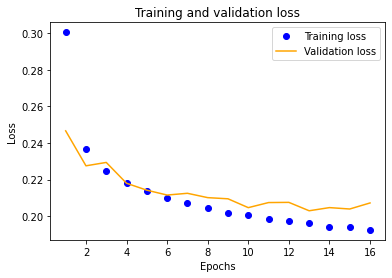

In [ ]:
# let's see the training and validation loss by epoch
history.history.keys()
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# see how the model did! - Training
preds = np.round(model1.predict(X_train),0)

# confusion matrix
confusion_matrix(y_train, preds) # order matters! (actual, predicted)

array([[28782,   171],
       [ 3047, 13148]])

In [ ]:
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     28953
           1       0.99      0.81      0.89     16195

    accuracy                           0.93     45148
   macro avg       0.95      0.90      0.92     45148
weighted avg       0.93      0.93      0.93     45148



In [ ]:
# see how the model did! - Test
preds = np.round(model1.predict(X_test),0)

# confusion matrix
confusion_matrix(y_test, preds) # order matters! (actual, predicted)

array([[7109,   60],
       [ 796, 3322]])

In [ ]:
print(classification_report(y_test, preds))
## Also, a little bit overfitting!!

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7169
           1       0.98      0.81      0.89      4118

    accuracy                           0.92     11287
   macro avg       0.94      0.90      0.91     11287
weighted avg       0.93      0.92      0.92     11287



*   There was overfitting in both FNN and CNN, and we tweaked Neural Network architecture to add dropout (30%), to get good fit models.
*   We also change our early stopping, to use less resources and also avoid too much learning, leading to overfitting.
*   However, the result of **updated CNN** doesn't perform 
better than the original CNN. Maybe CNN is not a good candidate for the prediction of our case. # Conclusion (5 pts)
*   In conclusion, our best model is **FNN**.






# Conclusion (5 pts)


1. It is really important for hotels to forecast cancellation pattern as they need to be really optimal in allocating rooms to guest, and drive profits.
Many hotels tend to overbook (just like flights), as they have identified average cancellation of rooms. Classification model based on Neural Networks 
helps getting the right forecast cancellation number in advance. 
We have created 3 models: Logistic Regression, FNN, and CNN Models, to predict if a customer is likely to 
cancel booking. We have used Sigmoid function so that the predicted output be either 0 (Cancel:No) or 1 (Cancel:Yes).
FNN Model with an accuracy of over 90% in both training and Test datasets, would give confidence to Hotel Planning Team, to devise a customize
cancellation plan for their customers. For Example, a customer who'd been loyal to the hotel, can get more parking space as an offer, while another user
who's a history of multiple cancellations in the past, might get less promotional offers on cancellation costs.

2. Feature Engineering helped us to choose the right set of predictor variables (Co-variates), as these were the deciding factors in likelihood of room cancellation.
Vacation arrival month was the biggest factor deciding if a customer is likely to cancel the hotel booking. Hotels can make make custom booking/cancellation rules in different time of the year, to ensure less losses.
If customers tend to get sick more in November (As seen from feature engineering and Permuation Feature Importance), then hotels can book over book their rooms with a buffer (Ensuring there is a back-up plan in case no customers cancelled the booking)

3. Baseline Logistic Regression Model was a good model, to classify the outcome variable, but Neural Network outperform regression, using right set of parameters.
Modified Neural Network architecture (adding dropout layer after first hidden layer, changing early stopping configuration), avoided Overfitting, and helped creating a robust improved FNN model.


4. Other predictor variables such as Room reserve type (Reserved vs Assigned) also played a major role in hotel rooms cancellation. Hotel Planning team can segregate 
customers into two clusters (Prob(Cancellation): Yes and Prob(Cancellation): No), and make seperate marketing tactics and promotional offer for the two baskets.

5. It seems that customers booking hotels with arrival date in November are more likely to cancel their reservation than customers booking hotels for other time and customers who require car parking spaces are less likely to cancel. These insights will help planning team, to share marketing offers (eg., more parking) to customers who tend to cancel more. These offers would help retain customers
Those who asking for room type H are more likely to cancel their order. As it leads to more cancellation probability, then planning team can provide other room types to high cancellation prone customers

**Neural Network & Feature Engineering would help increase revenue and also would lead to create more loyal customers, and planning team do not have to rely on intuition but can
follow data-based recommendation to take decisions**
